## Diagonalization

In this section, we explain the effect of matrix multiplication in terms of eigenvalues and eigenvectors.  This will allow us to write a new matrix factorization, known as diagonalization, which will help us to further understand matrix multiplication.  We also introduce a SciPy method to find the eigenvalues and eigenvectors of arbitrary square matrices.

Since the action of an $n\times n$ matrix $A$ on its eigenvectors is easy to understand, we might try to understand the action of a matrix on an arbitrary vector $X$ by writing $X$ as a linear combination of eigenvectors.  This will always be possible *if the eigenvectors form a basis for* $\mathbb{R}^n$.  Suppose $\{V_1, V_2, ..., V_n\}$ are the eigenvectors of $A$ and they do form a basis for $\mathbb{R}^n$.  Then for any vector $X$, we can write 
$X = c_1V_1 + c_2V_2 + ... c_nV_n$.  The product $AX$ can easily be computed then by multiplying each eigenvector component by the corresponding eigenvalue.

$$
\begin{eqnarray*}
AX & = & A(c_1V_1 + c_2V_2 + ... c_nV_n) \\
   & = & c_1AV_1 + c_2AV_2 + ... c_nAV_n \\
   & = & c_1\lambda_1V_1 + c_2\lambda_2V_2 + ... c_n\lambda_nV_n
\end{eqnarray*}
$$



### Example 1:  Shear

We first consider a matrix that represents a shear along the line $x_1=-x_2$.

$$
\begin{equation}
A = \left[ \begin{array}{rr} 2 & -1  \\ -1 & 2 \end{array}\right]
\end{equation}
$$

In [7]:
import numpy as np
import laguide as lag

S = np.array([[1, 1],[1, -1]])
D = np.array([[1, 0],[0, 3]])
S_inverse = lag.Inverse(S)

A = S@D@S_inverse

print(A)

X = np.array([[3],[1]])
print(A@X)

[[ 2. -1.]
 [-1.  2.]]
[[ 5.]
 [-1.]]


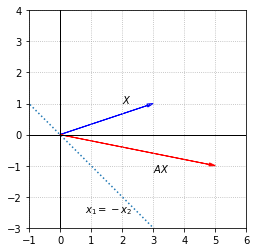

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
x=np.linspace(-6,6,100)

options = {"head_width":0.1, "head_length":0.2, "length_includes_head":True}

ax.arrow(0,0,3,1,fc='b',ec='b',**options)
ax.arrow(0,0,5,-1,fc='r',ec='r',**options)
ax.plot(x,-x,ls=':')

ax.set_xlim(-1,6)
ax.set_ylim(-3,4)
ax.set_aspect('equal')
ax.set_xticks(np.arange(-1,7,step = 1))
ax.set_yticks(np.arange(-3,5,step = 1))

ax.text(2,1,'$X$')
ax.text(3,-1.2,'$AX$')
ax.text(0.8,-2.5,'$x_1=-x_2$')

ax.axvline(color='k',linewidth = 1)
ax.axhline(color='k',linewidth = 1)

ax.grid(True,ls=':')

The effect of multiplication by $A$ can be understood through its eigenvalues and eigenvectors.  The first eigenvector of $A$ lies in the direction of the line $x_1=-x_2$.  We label it $V_1$ and observe that it gets scaled by a factor of 3 when multiplied by $A$.  The corresponding eigenvalue is $\lambda_1 = 3$.

$$
\begin{equation}
AV_1 = \left[ \begin{array}{rr} 2 & -1  \\ -1 & 2 \end{array}\right]
\left[ \begin{array}{r} 1 \\ -1 \end{array}\right] =
\left[ \begin{array}{r} 3 \\ -3 \end{array}\right] = 3V_1
\end{equation}
$$

The other eigenvector, which we label $V_2$, is orthogonal to the line $x_1=-x_2$.  This vector is left unchanged when multiplied by $A$, which implies that $\lambda_2 = 1$.


$$
\begin{equation}
AV_2 = \left[ \begin{array}{rr} 2 & -1  \\ -1 & 2 \end{array}\right]
\left[ \begin{array}{r} 1 \\ 1 \end{array}\right] = V_2
\end{equation}
$$

Since $\{V_1, V_2\}$ form a basis for $\mathbb{R}^2$, any other vector in $\mathbb{R}^2$ can be written as a linear combination of these vectors.  Let's take the following vector $X$ as an example.


$$
\begin{equation}
X = \left[ \begin{array}{r} 3 \\ 1 \end{array}\right]
\end{equation}
$$

To express $X$ in terms of the eigenvectors, we have to solve the vector equation $c_1V_1 + c_2V_2 = X$.

In [16]:
# Solve the matrix equation BC = X.  C is the vector of coefficients.
B = np.array([[1, 1],[-1,1]])
C = lag.SolveSystem(B,X)
print(C)

[[1.]
 [2.]]


Let's look at a visual representation of the linear combination $X = V_1 + 2V_2$.

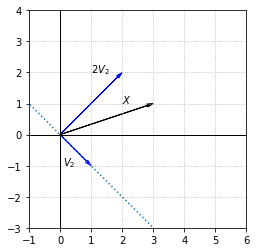

In [22]:
fig, ax = plt.subplots()

ax.arrow(0,0,3,1,fc='k',ec='k',**options)
ax.arrow(0,0,1,-1,fc='b',ec='b',**options)
ax.arrow(0,0,2,2,fc='b',ec='b',**options)
ax.plot(x,-x,ls=':')

ax.set_xlim(-1,6)
ax.set_ylim(-3,4)
ax.set_aspect('equal')
ax.set_xticks(np.arange(-1,7,step = 1))
ax.set_yticks(np.arange(-3,5,step = 1))

ax.text(1,2,'$2V_2$')
ax.text(2,1,'$X$')
ax.text(0.1,-1,'$V_2$')

ax.axvline(color='k',linewidth = 1)
ax.axhline(color='k',linewidth = 1)

ax.grid(True,ls=':')

We can now understand, and compute, the product $AX$ by evaluating the products of $A$ with its eigenvectors. 

$$
\begin{equation}
AX = A(V_1 + 2V_2) = AV_1 + 2AV_2 = \lambda_1V_1 + 2\lambda_2V_2 = 3V_1 + 2V_2
\end{equation}
$$

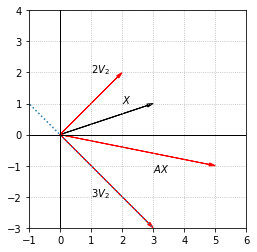

In [24]:
fig, ax = plt.subplots()

ax.arrow(0,0,3,1,fc='k',ec='k',**options)
ax.arrow(0,0,3,-3,fc='r',ec='r',**options)
ax.arrow(0,0,2,2,fc='r',ec='r',**options)
ax.arrow(0,0,5,-1,fc='r',ec='r',**options)
ax.plot(x,-x,ls=':')

ax.set_xlim(-1,6)
ax.set_ylim(-3,4)
ax.set_aspect('equal')
ax.set_xticks(np.arange(-1,7,step = 1))
ax.set_yticks(np.arange(-3,5,step = 1))

ax.text(1,2,'$2V_2$')
ax.text(2,1,'$X$')
ax.text(3,-1.2,'$AX$')
ax.text(1,-2,'$3V_2$')

ax.axvline(color='k',linewidth = 1)
ax.axhline(color='k',linewidth = 1)

ax.grid(True,ls=':')

### Computation with SciPy

We now demonstrate how to compute eigenvalues and eigenvectors for any square matrix using the function $\texttt{eig}$ from the $\texttt{linalg}$ module of the SciPy library.  This function accepts an $n\times n$ array representing a matrix and returns two arrays, one containing the eigenvalues, the other the eigenvectors.  We examine the usage by supplying our projection matrix as the argument. 

In [1]:
import scipy.linalg as SLA

A = np.array([[0.2, -0.4],[-0.4, 0.8]])
print(A)
print('\n')

evalues,evectors = SLA.eig(A)

print(evalues)

[[ 0.2 -0.4]
 [-0.4  0.8]]


[0.+0.j 1.+0.j]


The array of eigenvalues contains two entries that are in the format of $\alpha + \beta j$, which represents a complex number.  The symbol $j$ is used for the imaginary unit.  The value of $\beta$ is zero for both of the eigenvalues, which means that they are both real numbers.  The results confirm our conclusions that the eigenvalues are 0 and 1.

Next let's look at the array of eigenvectors.  We can slice the array into columns to give us convenient access to the vectors.

In [15]:
print(evectors)

V_1 = evectors[:,0:1]
V_2 = evectors[:,1:2]


[[-0.89442719  0.4472136 ]
 [-0.4472136  -0.89442719]]


We may not recognize the eigenvectors as those we found previously, but recall that eigenvectors are not unique.  The $\texttt{eig}$ function scales all the eigenvectors to unit length, and we arrive at the same result if we scale our choice of eigenvector.

In [18]:
V = np.array([[-2],[-1]])
print(V)
print('\n')
print(V/lag.Magnitude(V))

[[-2]
 [-1]]


[[-0.89442719]
 [-0.4472136 ]]


### Example

Let's try another example with a $3\times 3$ matrix.

$$
\begin{equation}
B = \left[ \begin{array}{rrr} 1 & 2 & 0  \\ 2 & -1 & 4 \\  0 & 3 & 1\end{array}\right]
\end{equation}
$$

In [25]:
B = np.array([[1,2, 0],[2,-1,4],[0,3,1]])
evalues, evectors = SLA.eig(B)

print(evalues)
print('\n')
print(evectors)

V_1 = evectors[:,0:1]
V_2 = evectors[:,1:2]
V_3 = evectors[:,2:3]

E_1 = evalues[0]
E_2 = evalues[1]
E_3 = evalues[2]

[-4.12310563+0.j  1.        +0.j  4.12310563+0.j]


[[ 3.19250163e-01  8.94427191e-01  4.19279023e-01]
 [-8.17776152e-01 -1.03817864e-16  6.54726338e-01]
 [ 4.78875244e-01 -4.47213595e-01  6.28918535e-01]]


We don't have the exact eigenvalues, but we can check that $BV_i - \lambda_iV_i = 0$ for $i=1, 2, 3$, allowing of for small precision error.  

In [38]:
print(B@V_1-E_1*V_1)

[[-4.44089210e-16+0.j]
 [ 2.22044605e-15+0.j]
 [-1.11022302e-15+0.j]]


Instead of $BV_i - \lambda_iV_i = 0$ for each $i$, we can package the calculations into a single matrix multiplication.  If $S$ is the matrix with columns $V_i$, then $BS$ is the matrix with columns $BV_i$.  This matrix should be compared to the matrix that has $\lambda_iV_i$ as its columns.  To construct this matrix we use a diagonal matrix $D$, that has the $\lambda_i$ as its diagonal entries.  The matrix product $SD$ will then have columns $\lambda_iV_i$.

$$
\begin{equation}
SD = \left[ \begin{array}{c|c|c} & & \\ V_1 & V_2 & V_3 \\ & & \end{array} \right]
\left[ \begin{array}{rrr} \lambda_1 & 0 & 0  \\ 0 & \lambda_2 & 0 \\  0 & 0 & \lambda_3 \end{array}\right]= 
\left[ \begin{array}{c|c|c} & & \\ \lambda_1V_1 & \lambda_2V_2 & \lambda_3V_3 \\ & & \end{array}\right]
\end{equation}
$$

We can now simply check that $BS-SD = 0$.

In [37]:
S = evectors

#  Since the eigenvalues are complex, it is best to use an array of complex numbers for D
D = np.zeros((3,3),dtype='complex128')
for i in range(3):
    D[i,i] = evalues[i]

print(D)
print('\n')
print(B@S-S@D)

[[-4.12310563+0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j  1.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  4.12310563+0.j]]


[[-4.44089210e-16+0.j -6.66133815e-16+0.j  4.44089210e-16+0.j]
 [ 2.22044605e-15+0.j  5.47907073e-16+0.j  0.00000000e+00+0.j]
 [-1.11022302e-15+0.j -1.11022302e-16+0.j  0.00000000e+00+0.j]]


### Diagonal Factorization

The calculation that we used to verify the eigenvalues an eigenvectors is also very useful to construct another important matrix factorization.  Suppose that $A$ is an $n\times n$ matrix, $D$ is a diagonal matrix with the eigenvalues of $A$ along its diagonal, and $S$ is the $n\times n$ matrix with the eigenvectors of $A$ as its columns.  We have just seen that $AS=SD$.  If $S$ is invertible, we may also write $A=SDS^{-1}$, which is known as the **diagonalization** of $A$.

The diagonalization of $A$ is important because it provides us with a complete description of the action of $A$ in terms of its eigenvectors.  Consider an arbitrary vector $X$, and the product $AX$, computed by using the three factors in the diagonization.

- $S^{-1}X$ computes the coordinates of $X$ in terms of the eigenvectors of $A$.
- Multiplication by $D$ then simply scales each coordinate by the corresponding eigenvalue.
- Multiplication by $S$ gives the results with respect to the standard basis.

This understanding does not provide a more efficient way of computing the product $AX$, but it does provide a much more general way of understanding the result of a matrix-vector multiplication.  As we will see in the next section, the diagonalization also provides a significant shortcut in computing powers of $A$.  

It should be noted that diagonalization of an $n\times n$ matrix $A$ is not possible when the eigenvectors of $A$ form a linearly dependent set.  In that case the eigenvectors do not span $\mathbb{R}^n$, which means that not every $X$ in $\mathbb{R}^n$ can be written as a linear combination of the eigenvectors.  In terms of the computation above, $S$ will not be invertible exactly in this case.

### Exercises

- Find the diagonalization of the matrix from **Example 1**.

$$
\begin{equation}
A = \left[ \begin{array}{rr} 2 & -1  \\ -1 & 2 \end{array}\right]
\end{equation}
$$

- Find the diagonalization of the following matrix.

$$
\begin{equation}
B = \left[ \begin{array}{rrr} 2 & 0 & 0  \\ 3 & -2 & 1 \\  1 & 0 & 1\end{array}\right]
\end{equation}
$$


- Write a function that accepts an $n\times n$ matrix $A$ as an argument, and returns the three matrices $S$, $D$, and $S^{-1}$ such that $A=SDS^{-1}$.  Make use of the $\texttt{eig}$ function in SciPy.

- Construct a $3\times 3$ matrix that is not diagonal and has eigenvalues 2, 4, and 10. 